<a href="https://colab.research.google.com/github/Shahanashirin-k/CREDIT_CARD-FRAUD_DETECTION/blob/main/CCFD_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD TRANSACTION

# Load the data

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import all the required library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset from Google Drive
df_C = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/creditcard.csv')

In [4]:
print(df_C.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# PRE-PROCESSING

### **EDA**

In [5]:
df_C.shape

(284807, 31)

In [6]:
df_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df_C.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df_C.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**It means that it doesn't have missing values**

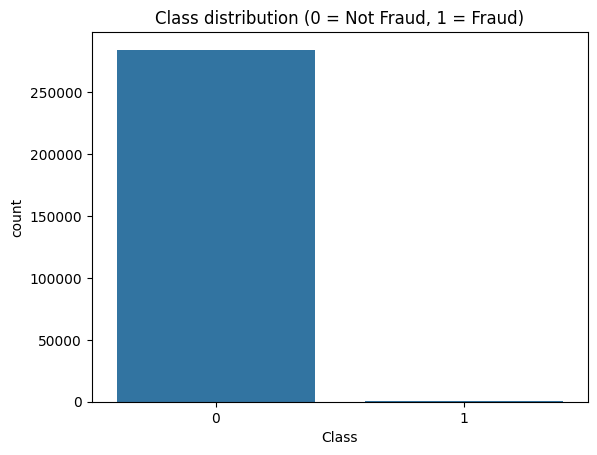

In [9]:
sns.countplot(x='Class', data=df_C)
plt.title('Class distribution (0 = Not Fraud, 1 = Fraud)')
plt.show()

As all the features from V1 to V28 are already normalized, so we just have to normalize the Amount

In [10]:
df_C.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Percentage of fraud cases'
fraud_percentage = df_C['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [12]:
#Seperating based on Class analysis
Actual= df_C[df_C.Class==0]
Actual.shape

(284315, 31)

In [13]:
Fraud= df_C[df_C.Class==1]
Fraud.shape

(492, 31)

seperating the data based on the Amount

In [14]:
#Seperating the data based on the amount wise analysis
Actual.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [15]:
Fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


*   Fraudulent transactions tend to have a higher average transaction amount compared to non-fraudulent ones (122.2 vs 88.29).
*   While the maximum amount in fraudulent transactions is significantly lower than in non-fraudulent transactions, fraudulent transactions still show a higher mean and third quartile (75%) compared to non-fraudulent ones.


# FEATURE ENGINEERING

Based on Time

In [16]:
print(df_C['Time'].head(10))
print(df_C['Time'].describe())

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [17]:
df_C['Hour'] = pd.to_datetime(df_C['Time'], unit='s').dt.hour

<Axes: title={'center': 'Fraudulent Transactions by Hour'}, xlabel='Hour'>

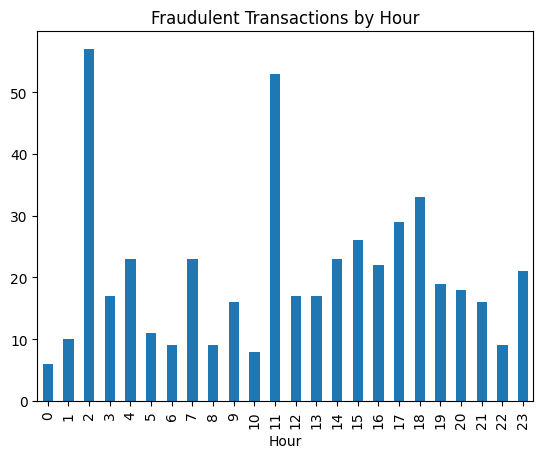

In [18]:
hourly_fraud_analysis = df_C[df_C['Class'] == 1].groupby('Hour').size()
hourly_fraud_analysis.plot(kind='bar', title='Fraudulent Transactions by Hour')

**Visualisation of Time VS Hour**

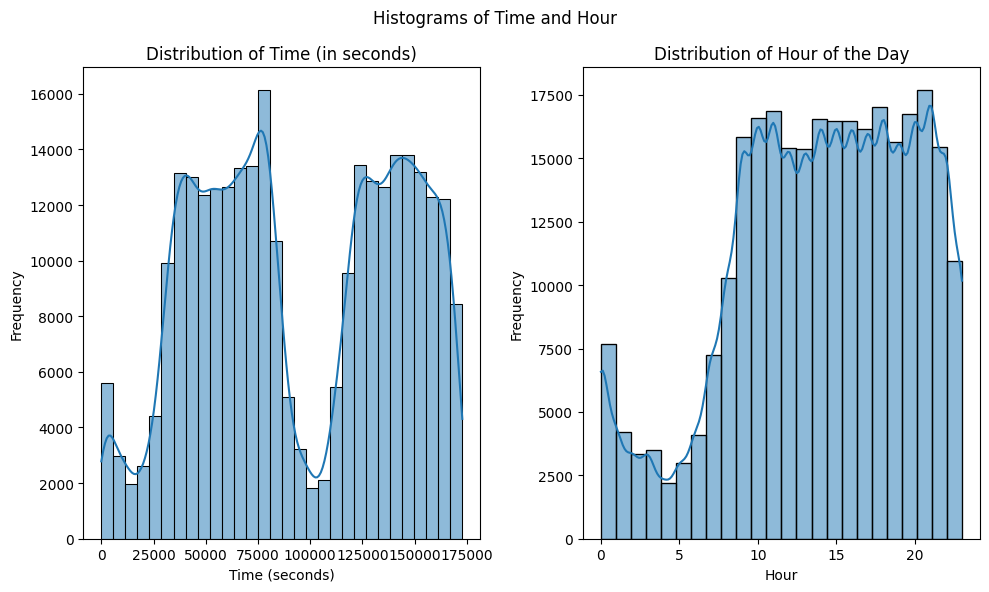

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_C is your DataFrame with 'Time' and 'Hour' columns
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=False)

# Plot the 'Time' column (in seconds)
sns.histplot(df_C['Time'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Time (in seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Frequency')

# Plot the 'Hour' column (hour of the day)
sns.histplot(df_C['Hour'], bins=24, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Hour of the Day')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Frequency')

# Add a super title for the entire figure
plt.suptitle("Histograms of Time and Hour")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


Based on Amount

In [20]:
amount_skewness = df_C['Amount'].skew()
time_skewness = df_C['Time'].skew()
hour_skewness = df_C['Hour'].skew()

print(f'Skewness of Amount: {amount_skewness}')
print(f'Skewness of Time: {time_skewness}')
print(f'Skewness of hour: {hour_skewness}')

Skewness of Amount: 16.977724453761024
Skewness of Time: -0.0355676180063216
Skewness of hour: -0.4904701602042523


Amount: The data is highly skewed to the right (positive skew), with a few large values making the distribution asymmetrical.

Time: The data is nearly symmetrical, with no significant skew in either direction.

**Log Transformation for the right skewed data**

In [21]:
df_C['Log_Amount'] = np.log1p(df_C['Amount'])

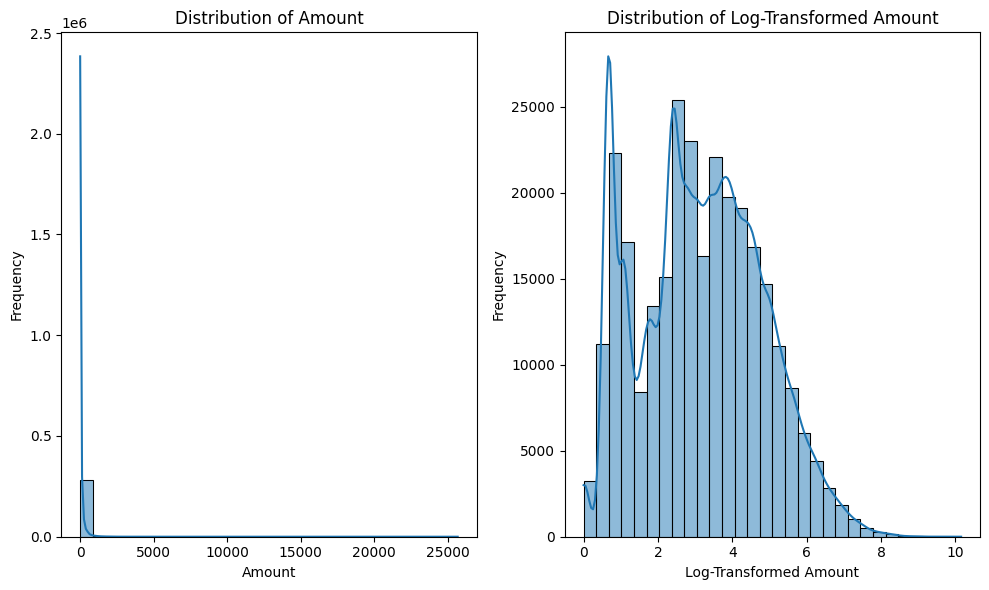

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Histogram for Amount
plt.subplot(1, 2, 1)
sns.histplot(df_C['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Histogram for Time
plt.subplot(1, 2, 2)
sns.histplot(df_C['Log_Amount'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Amount')
plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
# Categorize amount into bins
df_C['Amount_Category'] = pd.cut(df_C['Amount'], bins=[-1, 100, 1000, 10000, np.inf], labels=['Very Low', 'Low', 'Medium', 'High'])


In [24]:
# Filter and print rows with Amount_Category of 'Medium' or 'High'
filtered_df = df_C[df_C['Amount_Category'].isin(['Medium', 'High'])]
print(filtered_df[['Amount', 'Amount_Category']])


          Amount Amount_Category
51       1402.95          Medium
89       1142.02          Medium
164      3828.04          Medium
633      1015.61          Medium
865      1602.99          Medium
...          ...             ...
283875   1026.46          Medium
284154   1088.04          Medium
284249  10199.44            High
284383   1114.00          Medium
284497   1484.66          Medium

[2940 rows x 2 columns]


In [25]:
# Final DataFrame with engineered features
df_engineered = df_C
df_engineered.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hour,Log_Amount,Amount_Category
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,5.014760,Low
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1.305626,Very Low
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,5.939276,Low
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,4.824306,Low
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,4.262539,Very Low


# Train and Test Split

In [26]:
x = df_engineered.drop(columns= "Class", axis = 1)

In [27]:
y = df_engineered.Class

In [28]:
x.drop(['Time','Amount', 'Amount_Category'], axis=1, inplace=True)

In [29]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Hour,Log_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


In [30]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


**Splitting the data into Train data and Test data**

Splitting the data into 70% for training set and 30% of the data for test set.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [32]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(x_test))

199364
85443
199364
85443


# Balencing the data using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE only on the training data
x_smote, y_smote = smote.fit_resample(x_train, y_train.values.ravel())

# Print the new shape of x_train and y_train after SMOTE
print("Training set after SMOTE(x) - Features shape:", x_smote.shape)
print("Training set after SMOTE(y) - Target shape:", y_smote.shape)

Training set after SMOTE(x) - Features shape: (398046, 30)
Training set after SMOTE(y) - Target shape: (398046,)


In [34]:
# Check the class distribution
print(f"Before SMOTE - Class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"After SMOTE - Class distribution: {dict(zip(*np.unique(y_smote, return_counts=True)))}")

Before SMOTE - Class distribution: {0: 199023, 1: 341}
After SMOTE - Class distribution: {0: 199023, 1: 199023}


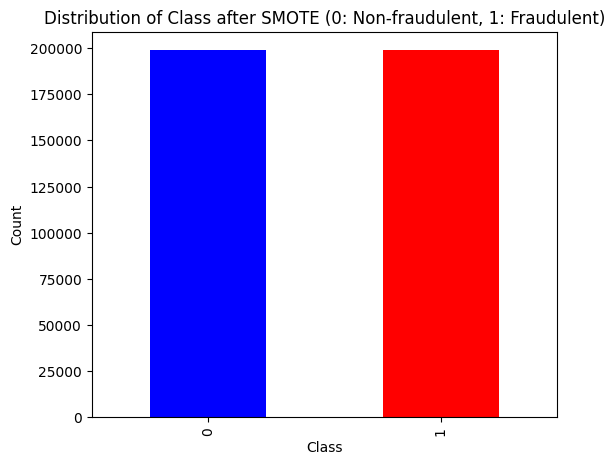

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_smote to a pandas Series
y_smote_series = pd.Series(y_smote)

# Visualize the distribution of 'Class' (target variable) after SMOTE
plt.figure(figsize=(6, 5))
y_smote_series.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class after SMOTE (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique) oversamples the minority class (fraudulent transactions, class 1) by generating synthetic samples. It does this by creating new instances along the lines connecting existing minority class instances, without altering the majority class instances. Thus, it brings both classes to the same size.

In [36]:
# Print the shape of the training and testing data
print("Training set shape:", x_smote.shape, y_smote.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (398046, 30) (398046,)
Testing set shape: (85443, 30) (85443,)


In [37]:
print(len(x_smote))
print(len(x_test))
print(len(y_smote))
print(len(x_test))

398046
85443
398046
85443


It means that SMOTE has balanced the dataset by oversampling the minority class (fraudulent transactions) in the training set to match the majority class count. Now both classes have an equal number of samples, summing to a total of 398042 samples in the training set.

 SMOTE is only applied to the training set to avoid data leakage, so the test set remains at its original 20% split of the full dataset.



*   Our training set is now balanced, which should help improve model performance by providing it with an equal number of fraudulent and authentic transactions during training.
*   The test set still has the original class imbalance.



# **MODEL SELECTION**

## USING TRADITIONAL ML MODELS

### **LR**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Standardize features for LR
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(x_test)

# Train the LR model
lr_model = LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)
lr_model.fit(x_train_smote_scaled, y_smote)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, lr_model.predict_proba(x_test)[:, 1]))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     85292
           1       0.01      0.93      0.02       151

    accuracy                           0.86     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.86      0.92     85443

AUC-ROC: 0.6027945914199541


### **RF**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train the RF model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_smote, y_smote)

# Predict on test set
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.89      0.82      0.86       151

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC: 0.969141923980355


**XGBoost**

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_smote, y_smote)

# Predict on test set
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.79      0.83      0.81       151

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC: 0.9783196672560457


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xgb_model.predict(x_test))
print(cm)


[[85259    33]
 [   26   125]]


The XGBoost model is performing quite well, especially on Class 0 (the majority class).
For the minority class (Class 1), the performance is also strong compared to LR and RF models, with Recall of 0.79.

In [53]:
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores = cross_val_score(xgb_model, x, y, cv=5, scoring='roc_auc')
print("Cross-Validation AUC-ROC scores:", scores)
print("Mean AUC-ROC:", scores.mean())


Cross-Validation AUC-ROC scores: [0.99191011 0.96539903 0.94689384 0.98865982 0.97746051]
Mean AUC-ROC: 0.9740646613325559


## Anomaly Detection